# Clustering

Up until now, we have sought to use previous data to predict something for unseen data. In regression, we sought to assign a value to new data, while in classification we sought to assign a category. For something slightly different, we move onto clustering. Clustering is a method to help us find our more about the data that we already have. As the name implies, the goal of clustering is to segment the data into clusters. In doing this, we might discover some patterns, structures, or relationships that we had not seen before, giving us greater insight into our data. Certainly, if we have very simple data we can often just plot the data to identify clusters, but clustering algorithms become very useful when the data gets more complex.  

# K-Means Clustering

The first algorithm we are going to look at for clustering is K-means. This is an interative algorithm for clustering data into $k$ clusters. The algorithm is as follows:
1. Choose the number of clusters $k$. We will later talk about methods for choosing $k$, for now just assume it is given.
2. Select unique $k$ points (not necesarily from the data set). These are called the centroids.
3. Assign each data point to the closest centroid. In doing this, we will end up with $k$ clusters.
4. For each cluster, compute the new centroid which is the mean of all the points in the cluster.
5. Reassign each data point to the closest centroid. If any reassignment took place, repeat step 4. Else, the algorithm has converged and the model is ready.

One problem that can occur with this algorithm is called the random initialization trap. It turns out that the location of the initial centroids will affect the results and doing so randomly can lead to suboptimal results. There are ways to choose the centroids so that this does not occur, but this will all be done in the background so we will not worry about it. The next logical question is what is a good way to choose the number of clusters for our algorithm? We need to define a metric to tell us how good our clustering algorithm was able to perform for a given number of clusters. We will call this metric the within cluster sum of squares (WCSS). The formula is $WCSS=\sum_{i=1}^{k}(\sum_{j=1}^{q_i}distance(P_j,C_i)^2)$ where $k$ is our number of clusters, $q_i$ is the number of points in cluster $i$, $P$ represents a point, and $C_i$ is the centroid of cluster $i$. We want to minimize $WCSS$ but be careful, because if we choose $k$ equal to the number of points we have, $WCSS$ will be $0$, the minimum possible value. Also note that $WCSS$ is always decreasing, but it will level out. The key is to figure out where $WCSS$ starts to level out and choose that as your number of clusters. This is often does graphically and is called the *elbow method*. We will now see an example of k-means in action. For this, we first need to define our new business problem. We are being employed by a mall who wants to learn more about their customers. The data given to us has a number of attributes, but we are only going to focus on two: the annual income and the spending score. Annual income is self explanitory, and spending score is a metric of how much a customer spends, with $1$ being the lowest spenders and $100$ being the highest. The mall wants you to identify groups within this data set, but does not know how many groups it wants. So we will use k-means to group, and the elbow method to find our ideals number of groups. Let us first import the dataset and plot the relevant data.

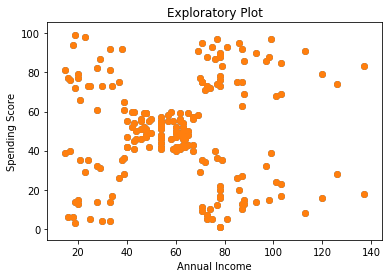

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

plt.scatter(X[:,0], X[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Exploratory Plot")
plt.show()

From this plot, we can maybe see some clusters pop out. I personally five different logical clusters, but we will now run an analysis to find the optimal number of clusters. We will run k-means on each $k$ from 1 to 10 and see where the within cluster sum of squares flattens out. The library we will be using already computes the WCSS, but calls it intertia.

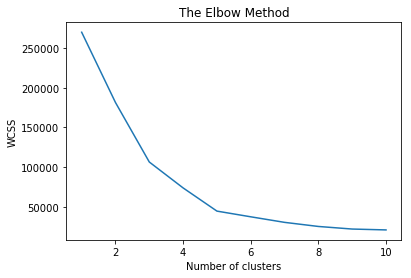

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Our intuition was right, it appears that we flatten, or elbow, at 5 clusters. Now we will run the k-means algorithm with 5 clusters and see how our algorithm splits our points up. We will also plot our centroids (which the method also computes) so that we can see where the centers of our clusters converged to.

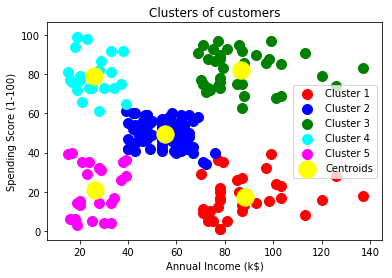

In [6]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clustering

The other clustering algorithm we are going to go over is the hierarchical clustering algorithm. The goal of the algorithm is the same, and often the results are similar or the same, but the methodology is different. There are actually two types of hierarchical clustering. Agglomerative, or bottom
up, is the kind that we are going to cover. The other is divisive, but it will not be covered. The steps for agglomerative are as follows:

1. Make each data point a single cluster, which will form $n$ clusters where $n$ is the number of data points.
2. Take the two closest data points and make them into a cluster, forming $n-1$ clusters.
3. Take the two closest clusters and make them into one cluster, forming $n-2$ clusters.
4. Repeat step three until there is only one cluster.

Now this only forms one big cluster, which is not helpful at all. But the algorithm can generalize to form more than one cluster, as we will soon see. One issue that need to be addressed now is what do we mean by the distance of two clusters? Distance between points is pretty simple, and is often just the Euclidean distance. But distance between clusters is more complex. We could choose the distance between the closest point. Or the distance between the farthest points. Or the average distance over all points. Or the distance between centroids. As you can see, there are many choices and the choice will affect our outcome. Often, the choice is made based on the particular business problem and there is no single solution that always works. Now to understand more deeply about hierarchical cluserting works. To understand this better, we need to learn about the **dendogram**. A dendogram is a way to help us visualize the relationship between clusters. A dendogram is a two-dimensional graph where the x-axis represent all of our points (spaced evenly apart) and the y-axis represents the distance between clusters. So we two clusters are connected in the dendogram, the height of the line between them represents how far apart them are. An example of a dendogram is shown below.
![dendogram](dendogram.png)

The way to use the dendogram in our clustering is to set a vertical threshold on our chart. We would essentially be saying, "We don't want the distance between clusters to be greater than our threshhold." Determining the threshold can be a pit subjecive. One common way to do it is to imagine that every horizontal line in your dendogram extends all the way across the plot. Now take the longest vertical stretch of line between two horizontal lines that you can find, and put your threshold somewhere along that line. However many clusters you are left with is often a good choice. Now let us see an example of this with our python code. First step, as always, is to import our data. We will use the same dataset that was used above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

Now we need to make a dendogram of our data so that we know a good amount of clusters to choose when we make our agglomerative clustering. We can make the dengogram in python, shown below. Note that the 'ward' method used below attemps to minimize the variance in the clusters. We do not need to worry too much about it.

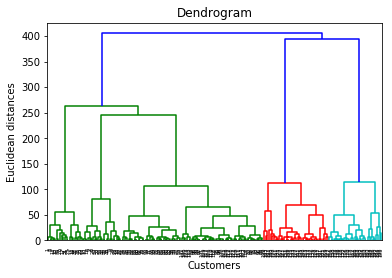

In [2]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Using our method described above, we see that the highest vertical line that would not be crossed by any hypothetical horizontals would be the third longest green line. We can put our threshold anywhere along that line, so we will put it in the middle, around 150. Now the number of horizontal lines that crosses our threshold is the number of clusters that we have. So with our threshold at 150, five horizontal lines cross, meaning we want 5 clusters. With that in mind, let us run our algorithm and plot the results.

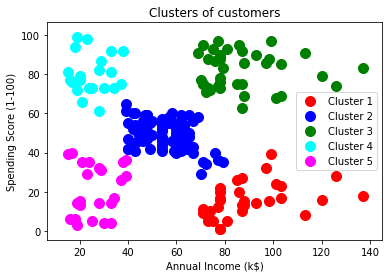

In [3]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

That wraps up the section on clustering. Out of the two algorithms, k-means is often more appropriate and it is much faster one large datasets and often performs better as well. The only drawback of k-means, the therefore only real pro for hierarchical clusterin